<a href="https://colab.research.google.com/github/HenriqueCSilva/Stock-Support-Prices/blob/main/stocks_support_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite o ticker da ação (ex: PETR4.SA): M1TA34.SA


[*********************100%***********************]  1 of 1 completed

Buscando dados para M1TA34.SA...


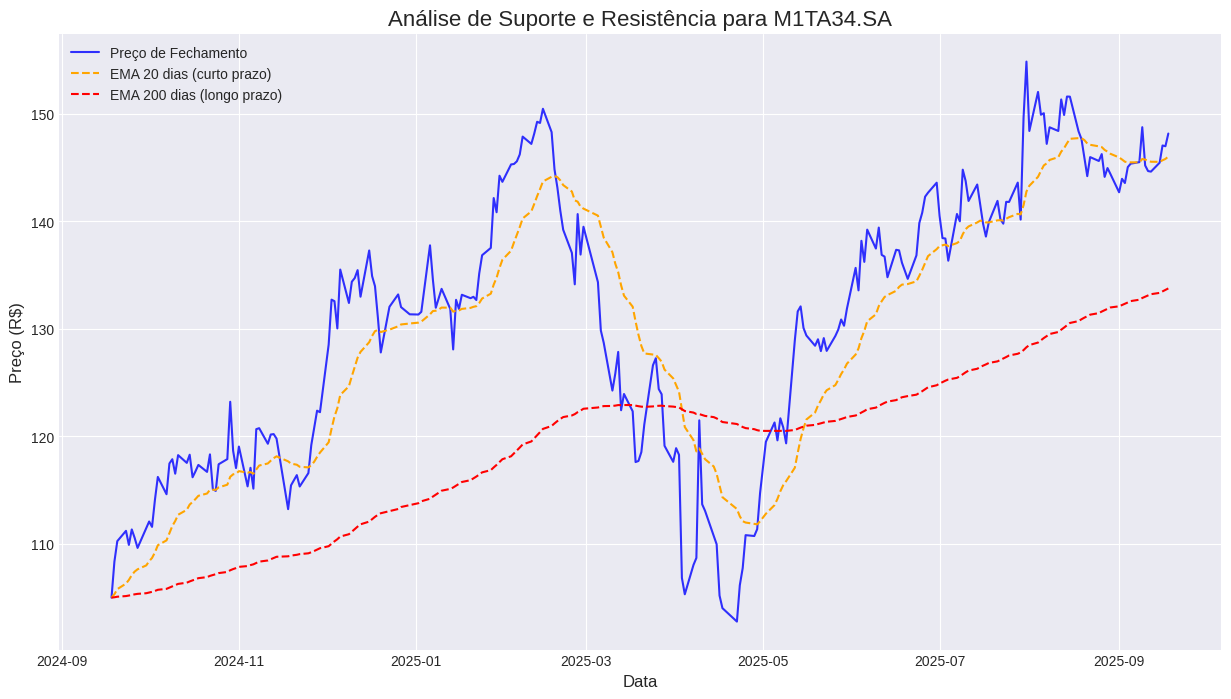


--- Análise para o ticker M1TA34.SA ---
Último Preço de Fechamento: R$ 148.16
Última EMA de 200 dias: R$ 133.76

* O preço da ação está ACIMA da EMA de 200 dias. Isso pode indicar uma tendência de alta de longo prazo.
* A EMA de 200 dias em R$ 133.76 pode atuar como um patamar de SUPORTE.


In [6]:
# -*- coding: utf-8 -*-
"""
# Análise de Suporte de Ações com yfinance

Este notebook busca dados históricos de uma ação, calcula suas Médias Móveis Exponenciais (EMAs) de 20 e 200 dias e determina possíveis patamares de suporte ou resistência com base na EMA de 200 dias.
"""

# 1. Instalar as bibliotecas necessárias
# REVISÃO: Nenhuma mudança aqui. A instalação está correta.
!pip install -q yfinance pandas matplotlib

# 2. Importar as bibliotecas
# REVISÃO: Adicionamos o type hinting para melhorar a legibilidade do código.
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 3. Função para analisar a ação
def analisar_acao(ticker: str):
    """
    Analisa uma ação, calcula as EMAs e plota o gráfico.

    Args:
        ticker (str): O ticker da ação (ex: 'PETR4.SA').
    """
    print(f"Buscando dados para {ticker}...")
    # 3.1. Baixar os dados históricos da ação
    # REVISÃO: Adicionado `auto_adjust=True`.
    # Esta é a principal melhoria. A documentação do yfinance recomenda usar `auto_adjust=True`.
    # Isso ajusta automaticamente os preços para dividendos e desdobramentos (splits),
    # o que é crucial para uma análise técnica precisa e também remove o aviso (FutureWarning) que aparecia.
    try:
        dados = yf.download(ticker, period='1y', auto_adjust=True)
        if dados.empty:
            print(f"Não foi possível encontrar dados para o ticker {ticker}. Verifique se o código está correto.")
            return
    except Exception as e:
        print(f"Ocorreu um erro ao baixar os dados: {e}")
        return

    # 3.2. Calcular as Médias Móveis Exponenciais (EMAs)
    # REVISÃO: Nenhuma mudança aqui. O cálculo está correto.
    dados['EMA_20'] = dados['Close'].ewm(span=20, adjust=False).mean()
    dados['EMA_200'] = dados['Close'].ewm(span=200, adjust=False).mean()

    # 3.3. Plotar o gráfico para visualização
    # REVISÃO: Pequenos ajustes estéticos no gráfico para melhor visualização.
    plt.style.use('seaborn-v0_8-darkgrid') # Deixa o gráfico com um visual mais moderno
    plt.figure(figsize=(15, 8))

    # Preços de fechamento da ação
    plt.plot(dados.index, dados['Close'], label='Preço de Fechamento', color='blue', alpha=0.8)

    # EMAs calculadas
    plt.plot(dados.index, dados['EMA_20'], label='EMA 20 dias (curto prazo)', color='orange', linestyle='--')
    plt.plot(dados.index, dados['EMA_200'], label='EMA 200 dias (longo prazo)', color='red', linestyle='--')

    # Configurações do gráfico
    plt.title(f'Análise de Suporte e Resistência para {ticker}', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Preço (R$)', fontsize=12)
    plt.legend(fontsize=10)
    plt.show()

    # 3.4. Interpretação e análise
    # REVISÃO: A lógica original estava correta. Mantida com pequenas melhorias na formatação do texto.
    print(f"\n--- Análise para o ticker {ticker} ---")

    ultimo_preco = dados['Close'].iloc[-1]
    ultima_ema_200 = dados['EMA_200'].iloc[-1]

    # CORREÇÃO: Usamos .item() para extrair o valor numérico da Série antes de formatar.
    print(f"Último Preço de Fechamento: R$ {ultimo_preco.item():.2f}")
    print(f"Última EMA de 200 dias: R$ {ultima_ema_200.item():.2f}")

    # CORREÇÃO: Usamos .item() aqui também para a comparação numérica.
    if ultimo_preco.item() < ultima_ema_200.item():
        print(f"\n* O preço da ação está ABAIXO da EMA de 200 dias. Isso pode indicar uma tendência de baixa de longo prazo.")
        print(f"* A EMA de 200 dias em R$ {ultima_ema_200.item():.2f} pode atuar como um patamar de RESISTÊNCIA.")
    else: # Inclui o caso de ser igual
        print(f"\n* O preço da ação está ACIMA da EMA de 200 dias. Isso pode indicar uma tendência de alta de longo prazo.")
        print(f"* A EMA de 200 dias em R$ {ultima_ema_200.item():.2f} pode atuar como um patamar de SUPORTE.")

# 4. Inserir o Ticker da ação
# REVISÃO: Adicionado `.strip()` para remover espaços em branco que o usuário possa digitar acidentalmente.
ticker_desejado = input("Digite o ticker da ação (ex: PETR4.SA): ").upper().strip()

# 5. Rodar a análise
if ticker_desejado: # Garante que o usuário digitou algo
    analisar_acao(ticker_desejado)
else:
    print("Nenhum ticker foi inserido.")